In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

In [311]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/us-income.csv')

In [312]:
data.head()

,FIPS,State,County,POP_2009,Per_Cap_2009,Personal_income_2009
0,1001,AL,Autauga,54135,32602,1764926
1,1003,AL,Baldwin,179406,34768,6237544
2,1005,AL,Barbour,27657,26461,731828
3,1007,AL,Bibb,22941,23803,546064
4,1009,AL,Blount,57341,27417,1572126


In [313]:
data.shape

(3138, 6)

In [314]:
data.dtypes

FIPS                     int64
State                   object
County                  object
POP_2009                object
Per_Cap_2009            object
Personal_income_2009    object
dtype: object

In [315]:
data.isnull().sum()

FIPS                    0
State                   0
County                  0
POP_2009                0
Per_Cap_2009            0
Personal_income_2009    0
dtype: int64

In [316]:
ind = data[data['POP_2009']=='(NA)'].index
ind

Int64Index([  67,   90,   93,   94,   98,  101,  102,  103,  104,  105,  106,
             107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,
             118,  119, 3114],
           dtype='int64')

In [317]:
data.drop(ind, axis=0, inplace=True)

In [318]:
data['POP_2009'] = data['POP_2009'].astype(int)
data['Per_Cap_2009'] = data['Per_Cap_2009'].astype(float)
data['Personal_income_2009'] = data['Personal_income_2009'].astype(int)

In [319]:
data.dtypes

FIPS                      int64
State                    object
County                   object
POP_2009                  int64
Per_Cap_2009            float64
Personal_income_2009      int64
dtype: object

In [320]:
data.head()

,FIPS,State,County,POP_2009,Per_Cap_2009,Personal_income_2009
0,1001,AL,Autauga,54135,32602.0,1764926
1,1003,AL,Baldwin,179406,34768.0,6237544
2,1005,AL,Barbour,27657,26461.0,731828
3,1007,AL,Bibb,22941,23803.0,546064
4,1009,AL,Blount,57341,27417.0,1572126


In [321]:
#Data Analysis

In [322]:
#State column

In [323]:
#finding total number of state
data['State'].value_counts()

 TX                               254
 GA                               159
 KY                               120
 MO                               115
 KS                               105
                                 ... 
 Manassas + Manassas Park           1
 Colonial Heights + Petersburg      1
 SD*                                1
 Staunton + Waynesboro              1
 Buena Vista + Lexington            1
Name: State, Length: 63, dtype: int64

In [324]:
#total number of country
total_unique_county = data['County'].nunique()

#total number of County in every State
df = pd.DataFrame(data.groupby(['State']).County.agg(['count']).sort_values(by='count', ascending=False))

#percent of county in every State
df['percent_county'] = df['count']/total_unique_county*100
df

,count,percent_county
State,,
TX,254,13.857065
GA,159,8.674304
KY,120,6.546645
MO,115,6.273868
KS,105,5.728314
...,...,...
DC,1,0.054555
Colonial Heights + Petersburg,1,0.054555
Manassas + Manassas Park,1,0.054555


In [325]:
#total population
total_population = data['POP_2009'].sum()

#total population in every state 
df = pd.DataFrame(data.groupby(['State']).POP_2009.agg(['sum']))

#percent of population in every state
percent_population = df['sum']/total_population*100
df['percent'] = percent_population

#changing columns name
df.columns = ['population_sum','population_percent']
df

,population_sum,population_percent
State,,
AK,597836,0.194880
AK*,101059,0.032943
AL,4757938,1.550971
AR,2896843,0.944300
AZ,6128926,1.997880
...,...,...
WA,6667426,2.173417
WI,5623184,1.833020
WI*,46080,0.015021


In [326]:
#first 10 most per capital income in State
df = pd.DataFrame(data.loc[:,['State','Per_Cap_2009']])
df = df.sort_values(by='Per_Cap_2009', ascending=False).head(10)
df

,State,Per_Cap_2009
3134,WY,129161.0
1881,NY,110226.0
332,CT,100243.0
317,CO,92329.0
230,CA,82955.0
2447,SD,75755.0
1910,NY,75491.0
2847,VA,74912.0
1249,MA,74782.0
247,CA,73167.0


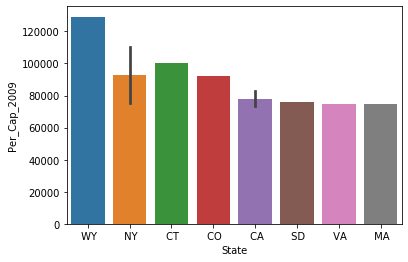

In [327]:
sns.barplot(x=df['State'], y=df['Per_Cap_2009'])

In [328]:
#total sum of Personal_income_2009
total_personal_income = data['Personal_income_2009'].sum()

#total sum and percent of personal income in every State
df = pd.DataFrame(data.groupby(['State']).Personal_income_2009.agg(['sum']))
df['percent'] = df['sum']/total_personal_income*100
df

,sum,percent
State,,
AK,28754079,0.238041
AK*,3977704,0.032930
AL,155513766,1.287425
AR,90880167,0.752354
AZ,208359003,1.724906
...,...,...
WA,278991093,2.309635
WI,214122616,1.772620
WI*,1376281,0.011394


In [329]:
#County column

In [330]:
#sum of population and percent in every County

In [331]:
#total population 
total_population = data['POP_2009'].sum()

#sum and percent of population in every county
df = pd.DataFrame(data.groupby(['County']).POP_2009.agg(['sum']).sort_values(by='sum', ascending=False))

#percent of population
percent = df['sum']/total_population*100

df['percent'] = percent
df.rename(columns={'sum':'sum of population'})

,sum of population,percent
County,,
Los Angeles,9787400,3.190453
Cook,5204045,1.696391
Orange,4786787,1.560375
Harris,4066360,1.325534
Maricopa,3803779,1.239939
...,...,...
Borden,618,0.000201
Petroleum,488,0.000159
Arthur,442,0.000144


In [332]:
#10 most percapital income County

In [333]:
df = data.loc[:,['County','Per_Cap_2009']].sort_values(by='Per_Cap_2009', ascending=False)
df = df.head(10)
df

,County,Per_Cap_2009
3134,Teton,129161.0
1881,New York,110226.0
332,Fairfield,100243.0
317,Pitkin,92329.0
230,Marin,82955.0
2447,Union,75755.0
1910,Westchester,75491.0
2847,Arlington,74912.0
1249,Nantucket,74782.0
247,San Francisco,73167.0


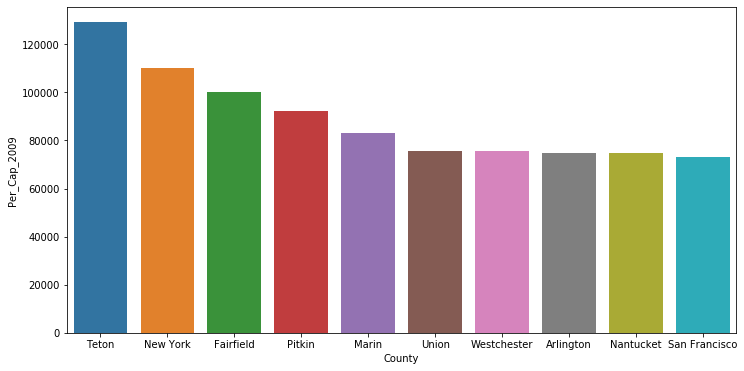

In [334]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['County'], y=df['Per_Cap_2009'])

In [335]:
#sum and percent of personal income in every County

In [336]:
#sum of personal income
total_personal_income = data['Personal_income_2009'].sum()

#sum of personal income in every County
df = pd.DataFrame(data.groupby(['County']).Personal_income_2009.agg(['sum']).sort_values(by='sum', ascending=False))

#percent of personal income in every County
percent = df['sum']/total_personal_income*100

df['percent'] = percent
df



,sum,percent
County,,
Los Angeles,411495352,3.406575
Cook,224936449,1.862142
Orange,204144515,1.690016
Harris,179034954,1.482146
New York,174534716,1.444890
...,...,...
Petroleum,15838,0.000131
Loup,15696,0.000130
Arthur,12129,0.000100


In [337]:
#most density of the population's sum and percent based on State and County

In [338]:
#total population
total_population = data['POP_2009'].sum()

df = pd.DataFrame(data.groupby(['State','County']).POP_2009.agg(['sum']).sort_values(by='sum', ascending=False))

percent = df['sum']/total_population*100
df['percent'] = percent
df.head(10)

sum   percent
State County                        
 CA   Los Angeles  9787400  3.190453
 IL   Cook         5181728  1.689116
 TX   Harris       4034866  1.315267
 AZ   Maricopa     3803779  1.239939
 CA   San Diego    3061203  0.997877
      Orange       2987177  0.973746
 NY   Kings        2487751  0.810946
 FL   Miami-Dade   2463943  0.803185
 TX   Dallas       2346378  0.764862
 NY   Queens       2217166  0.722742

In [339]:
#most 10 per capital income based on State and County

In [340]:
df = data.loc[:,['State','County','Per_Cap_2009']].sort_values(by='Per_Cap_2009', ascending=False)
df.head(10)

,State,County,Per_Cap_2009
3134,WY,Teton,129161.0
1881,NY,New York,110226.0
332,CT,Fairfield,100243.0
317,CO,Pitkin,92329.0
230,CA,Marin,82955.0
2447,SD,Union,75755.0
1910,NY,Westchester,75491.0
2847,VA,Arlington,74912.0
1249,MA,Nantucket,74782.0
247,CA,San Francisco,73167.0


In [341]:
#10 most personal income State and County

In [342]:
#total personal income
total_income = data['Personal_income_2009'].sum()

df = pd.DataFrame(data.groupby(['State','County']).Personal_income_2009.agg(['sum']).sort_values(by='sum', ascending=False))

#percent of personal income 
percent = df['sum']/total_income*100

df['percent'] = percent
df

sum   percent
State County                          
 CA   Los Angeles  411495352  3.406575
 IL   Cook         224311065  1.856965
 TX   Harris       177898662  1.472739
 NY   New York     174534716  1.444890
 CA   Orange       140937698  1.166756
...                      ...       ...
 TX   King             15365  0.000127
 NE   McPherson        13266  0.000110
      Arthur           12129  0.000100
 TX   Kenedy           10731  0.000089
      Loving            2172  0.000018

[3113 rows x 2 columns]

In [343]:
data['State'].nunique()

63

In [344]:
value_count = data['State'].value_counts()
value_count

 TX                               254
 GA                               159
 KY                               120
 MO                               115
 KS                               105
                                 ... 
 Manassas + Manassas Park           1
 Colonial Heights + Petersburg      1
 SD*                                1
 Staunton + Waynesboro              1
 Buena Vista + Lexington            1
Name: State, Length: 63, dtype: int64

In [345]:
index_sta = value_count[value_count==1].index
index_sta

Index([' Fairfax City + Falls Church', ' DC', ' Manassas + Manassas Park',
       ' Colonial Heights + Petersburg', ' SD*', ' Staunton + Waynesboro',
       ' Buena Vista + Lexington'],
      dtype='object')

In [346]:
for i in index_sta:
    ind = data[data['State']==i].index
    data.drop(ind, axis=0, inplace=True)

In [347]:
#checking space before name of every State

In [348]:
data[data['State']==' AL'].head()

,FIPS,State,County,POP_2009,Per_Cap_2009,Personal_income_2009
0,1001,AL,Autauga,54135,32602.0,1764926
1,1003,AL,Baldwin,179406,34768.0,6237544
2,1005,AL,Barbour,27657,26461.0,731828
3,1007,AL,Bibb,22941,23803.0,546064
4,1009,AL,Blount,57341,27417.0,1572126


In [349]:
data['State'] = data['State'].str.replace(' ', '')

In [350]:
#Checking Outlier

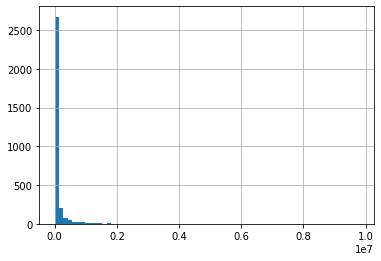

In [351]:
data['POP_2009'].hist(bins=70)

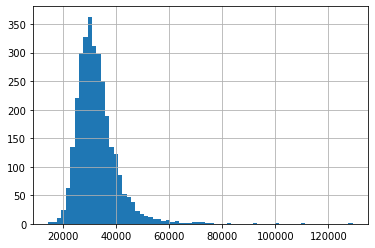

In [352]:
data['Per_Cap_2009'].hist(bins=70)

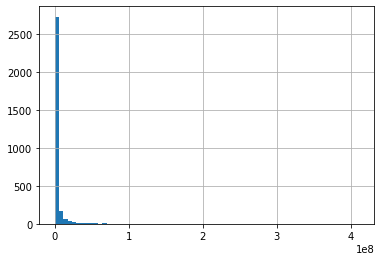

In [353]:
data['Personal_income_2009'].hist(bins=70)

In [354]:
#removing outlier

In [355]:
data.head()

,FIPS,State,County,POP_2009,Per_Cap_2009,Personal_income_2009
0,1001,AL,Autauga,54135,32602.0,1764926
1,1003,AL,Baldwin,179406,34768.0,6237544
2,1005,AL,Barbour,27657,26461.0,731828
3,1007,AL,Bibb,22941,23803.0,546064
4,1009,AL,Blount,57341,27417.0,1572126


In [356]:
#POP_2009

In [357]:
data = data[(data['POP_2009']<=500000) & (data['POP_2009']>1000)]

In [358]:
#Per_Cap_2009

In [359]:
data = data[data['Per_Cap_2009']<=100000]

In [360]:
#Personal_income_2009

In [361]:
data = data[(data['Personal_income_2009']<=10000000) & (data['Personal_income_2009']>=50000)]

In [362]:
#making dummy data

In [363]:
dummy_state = pd.get_dummies(data['State'])
dummy_County = pd.get_dummies(data['County'])

In [364]:
data = pd.concat([data,dummy_state,dummy_County], axis=1)

In [365]:
#dropping some columns

In [366]:
data = data.drop(['FIPS','State','County'], axis=1)

In [367]:
data.head()

,POP_2009,Per_Cap_2009,Personal_income_2009,AK,AK*,AL,AR,AZ,AZ*,CA,...,Yoakum,Yolo,York,York + Poquoson,Young,Yuba,Yukon-Koyukuk Census Area,Yuma,Zapata,Zavala
0,54135,32602.0,1764926,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,179406,34768.0,6237544,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27657,26461.0,731828,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22941,23803.0,546064,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57341,27417.0,1572126,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
#splitting dataset into feature and target data

In [369]:
X = data.drop(['Personal_income_2009'], axis=1)
y = data['Personal_income_2009']

In [370]:
#testing by different algorithm 

In [371]:
def selecting_best_model(X,y):
    algorithms={
        'Ridge':{
            'model':Ridge(),
            'param':{
                'alpha':[1.0,2.0],
                'copy_X':[True,False],
                'fit_intercept':[True, False],
                'normalize':[True, False]
            }
        },
        'RandomForestRegressor':{
            'model':RandomForestRegressor(),
            'param':{
                'n_estimators':[100,200,300],
                'bootstrap':[True,False],
                'min_samples_leaf':[1,2],
            }
        },
        'KNeighborsRegressor':{
            'model':KNeighborsRegressor(),
            'param':{
                'leaf_size':[20,30,40,50],
                'n_neighbors':[5,8,10,15,20]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'param':{
                'fit_intercept':[True, False],
                'max_iter':[10000,15000,20000],
                'tol':[.0001,.001],
            }
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=0)
    for name, algo in algorithms.items():
        gs = GridSearchCV(algo['model'], algo['param'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        
        scores.append({
            'name':name,
            'best_scores':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['name','best_scores', 'best_params'])

In [372]:
selecting_best_model(X,y)

,name,best_scores,best_params
0,Ridge,0.970884,"{'alpha': 2.0, 'copy_X': True, 'fit_intercept'..."
1,RandomForestRegressor,0.995856,"{'bootstrap': True, 'min_samples_leaf': 2, 'n_..."
2,KNeighborsRegressor,0.993165,"{'leaf_size': 20, 'n_neighbors': 5}"
3,Lasso,0.964323,"{'fit_intercept': False, 'max_iter': 10000, 't..."


In [385]:
#splitting feature and target dataset for training and testing

In [386]:
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.3, random_state=0)

In [406]:
#defining model

In [440]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(Xtrain,Ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [441]:
#predicted data
rfr.predict(xtest)

array([ 265791.33,  634944.79,   91228.29,  327829.53, 1454079.93,
        438544.25, 1960374.07, 7405188.48, 4697893.22, 1259850.79,
        274987.49, 2043497.78,  369667.02,  979828.66, 4978572.66,
        520927.32, 8178157.99, 1206888.06,  822867.11,  587419.49,
        305646.69, 4520190.72,  646561.76,  643931.53, 2640342.02,
        508436.93, 1270508.  ,  778144.38, 4443736.5 , 9515869.34,
        259175.57,  988210.2 ,  890425.01, 1290645.16, 1170873.72,
        607167.26, 9156477.71,  814827.82,  274255.42,  679068.05,
        260359.3 ,  521931.23,  471955.55, 1053798.7 ,  984857.22,
       1139538.24, 2626374.4 ,  984645.95, 4126384.44,  238528.17,
       1669355.94, 5364075.95, 1659161.23,  205507.44,  649163.83,
        464916.33, 1853783.99,  490188.68, 9454165.89,  322225.63,
        824876.09,  225309.33, 1098781.41,   81977.57,  133786.41,
        513757.99,  200967.83,  391594.37, 1897185.  ,  208421.48,
        494446.5 , 2493720.09, 2035430.67, 6471299.8 , 1742711

In [442]:
#accuracy of the model
rfr.score(xtest,ytest)

0.9955519592802877

In [402]:
#predicting with new data

In [443]:
def predicted_function(population, per_capi_income, state, county):
    
    state_ind = np.where(X.columns==state)[0][0]
    county_ind = np.where(X.columns==county)[0][0]

    
    x = np.zeros(len(X.columns))
    x[0]= population
    x[1]= per_capi_income
        
    if (state_ind>=0):
        x[state_ind] = 1
        
    if (county_ind>=0):
        x[county_ind] = 1
        
    return rfr.predict([x])[0]
    



In [444]:
predicted_function(54135, 32602, 'AL', 'Autauga')

1752721.03

In [445]:
predicted_function(27657, 26461,'AL', 'Barbour')

731468.06